<a href="https://colab.research.google.com/github/richasudindesai2021-stack/GroMart-Online-Delivery-Case-Study-Impact-Analysis/blob/main/case4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving case4_data.csv to case4_data (3).csv


In [ ]:
import pandas as pd


df = pd.read_csv("case4_data.csv")


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df.loc[df['Date'] < '2016-01-01', 'Online Available'] = 0


/tmp/ipython-input-3380702955.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
df.loc[df['Date'] < '2016-01-01', 'Online Available'] = 0


In [ ]:
df[df['Date'] < '2016-01-01']['Online Available'].value_counts()


,count
Online Available,
0,1908


In [ ]:
df['Year'] = df['Date'].dt.year


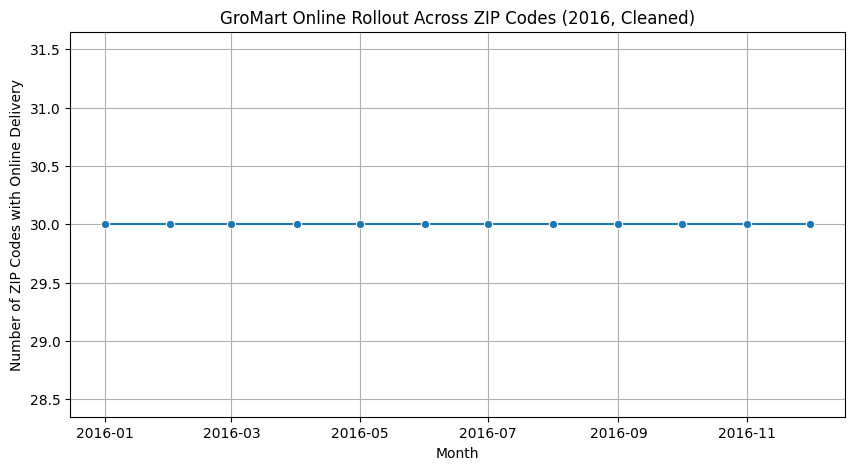

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

rollout_timeline = (
    df[df['Year'] == 2016]
    .groupby(df['Date'].dt.to_period('M'))['Online Available']
    .sum()
    .reset_index()
)
rollout_timeline['Date'] = rollout_timeline['Date'].dt.to_timestamp()

plt.figure(figsize=(10,5))
sns.lineplot(data=rollout_timeline, x='Date', y='Online Available', marker='o')
plt.title("GroMart Online Rollout Across ZIP Codes (2016, Cleaned)")
plt.ylabel("Number of ZIP Codes with Online Delivery")
plt.xlabel("Month")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("case4_data.csv")


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df.loc[df['Date'] < '2016-01-01', 'Online Available'] = 0
df['Period'] = np.where(df['Date'] < '2016-01-01', 'Before Rollout', 'After Rollout')


performance = (
    df.groupby(['Zipcodes', 'Online Available'])['Store Sales']
    .mean()
    .unstack(fill_value=0)
    .reset_index()
)
performance.columns = ['Zipcodes', 'Offline_Avg', 'Online_Avg']


performance['%_Change'] = ((performance['Online_Avg'] - performance['Offline_Avg']) /
                           performance['Offline_Avg']) * 100


store_data = df.groupby('Zipcodes')[['Median Income', 'Population', 'Pharmacy']].mean().reset_index()
performance = performance.merge(store_data, on='Zipcodes', how='left')

performance.head()


/tmp/ipython-input-2696206394.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Zipcodes,Offline_Avg,Online_Avg,%_Change,Median Income,Population,Pharmacy
0,90004,103455.027083,0.0,-100.0,24198.0,43589.0,0.0
1,90011,91068.747500,0.0,-100.0,16576.0,54694.0,1.0
2,90018,62561.194583,0.0,-100.0,21369.0,30926.0,0.0
3,90019,118912.175833,0.0,-100.0,27104.0,44848.0,1.0
4,90022,85269.855000,0.0,-100.0,21158.0,39199.0,1.0


In [ ]:
x_median = performance['%_Change'].median()
y_median = performance['Median Income'].median()

def assign_quadrant(row):
    if row['%_Change'] >= x_median and row['Median Income'] >= y_median:
        return 'A: High Income, High Growth'
    elif row['%_Change'] < x_median and row['Median Income'] >= y_median:
        return 'B: High Income, Low Growth'
    elif row['%_Change'] >= x_median and row['Median Income'] < y_median:
        return 'C: Low Income, High Growth'
    else:
        return 'D: Low Income, Low Growth'

performance['Quadrant'] = performance.apply(assign_quadrant, axis=1)


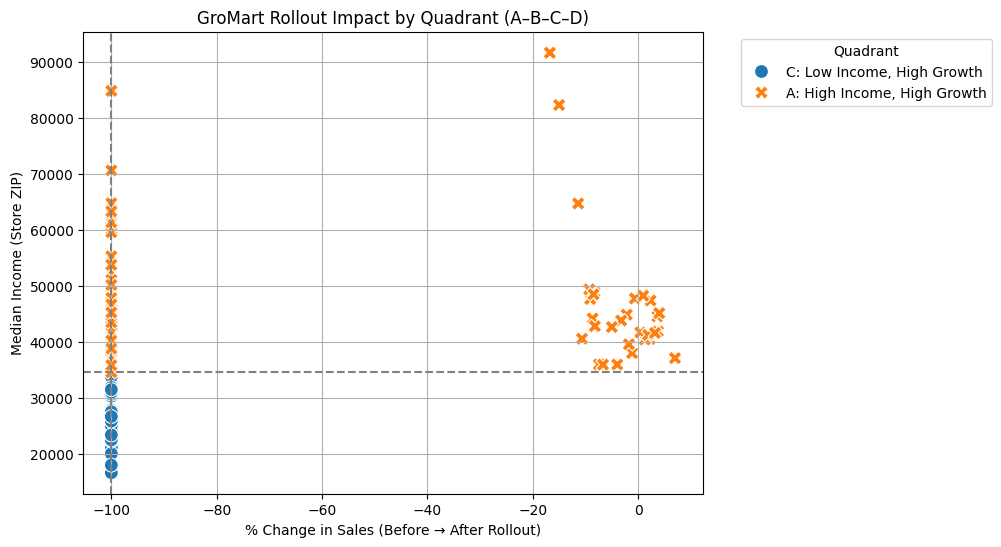

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=performance,
                x='%_Change', y='Median Income',
                hue='Quadrant', style='Quadrant', s=100)
plt.axvline(x=x_median, color='gray', linestyle='--')
plt.axhline(y=y_median, color='gray', linestyle='--')
plt.title("GroMart Rollout Impact by Quadrant (A–B–C–D)")
plt.xlabel("% Change in Sales (Before → After Rollout)")
plt.ylabel("Median Income (Store ZIP)")
plt.legend(title="Quadrant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


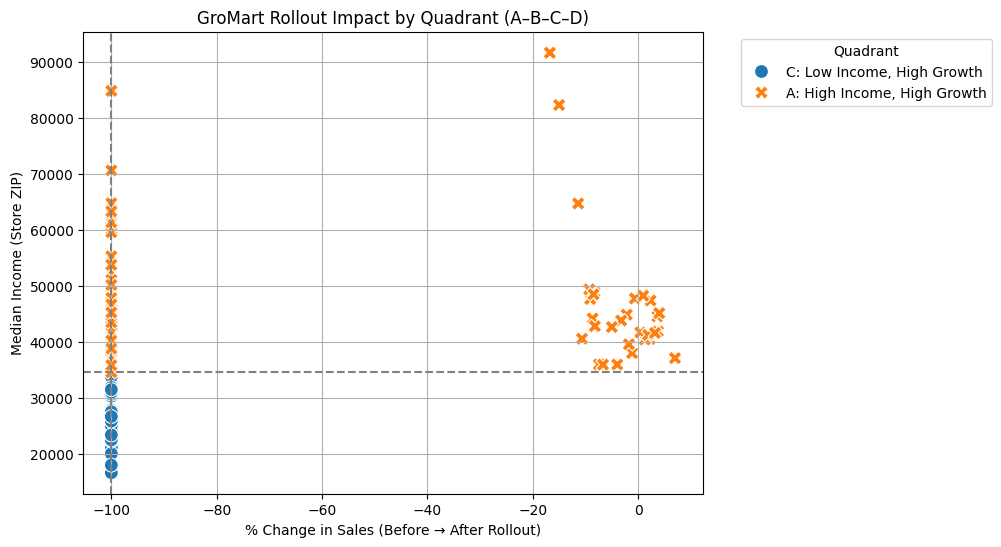

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=performance,
                x='%_Change', y='Median Income',
                hue='Quadrant', style='Quadrant', s=100)
plt.axvline(x=x_median, color='gray', linestyle='--')
plt.axhline(y=y_median, color='gray', linestyle='--')
plt.title("GroMart Rollout Impact by Quadrant (A–B–C–D)")
plt.xlabel("% Change in Sales (Before → After Rollout)")
plt.ylabel("Median Income (Store ZIP)")
plt.legend(title="Quadrant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


/tmp/ipython-input-2752784847.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


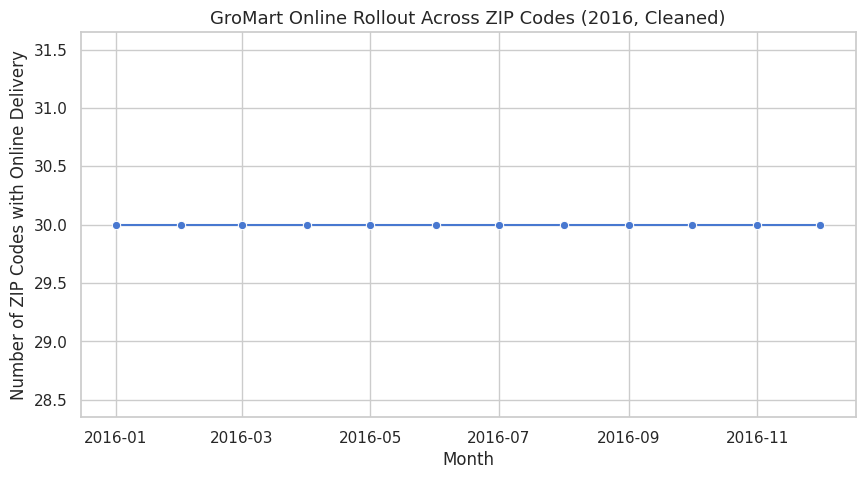

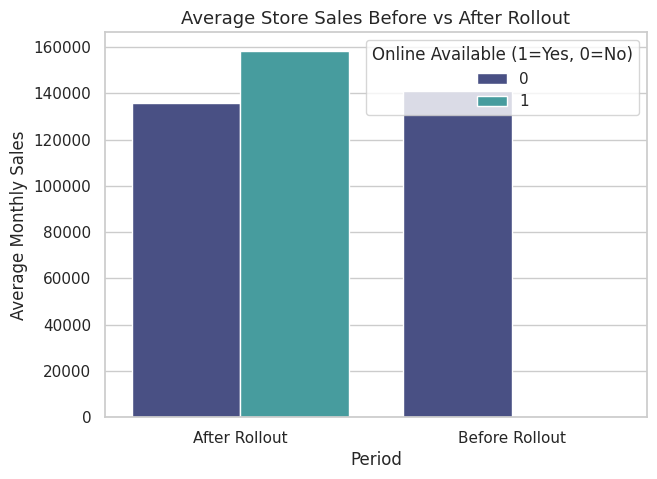

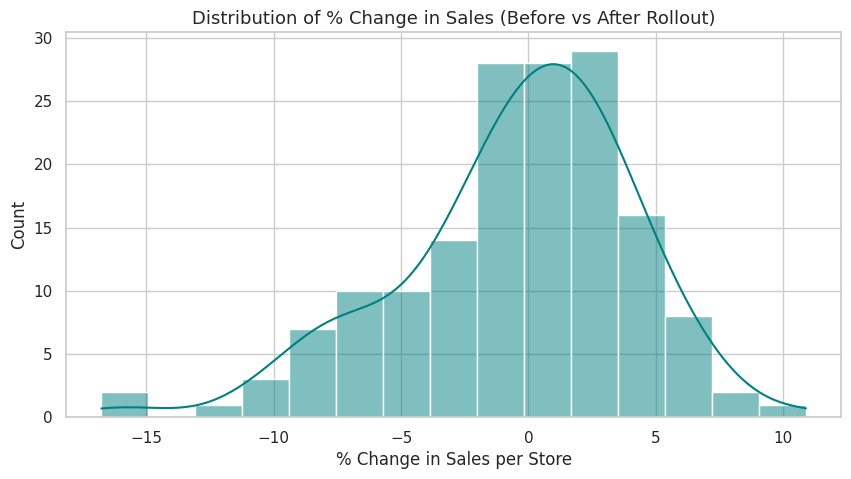

/tmp/ipython-input-2752784847.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=impact_2016, x='Online Available', y='Store Sales', palette='coolwarm')


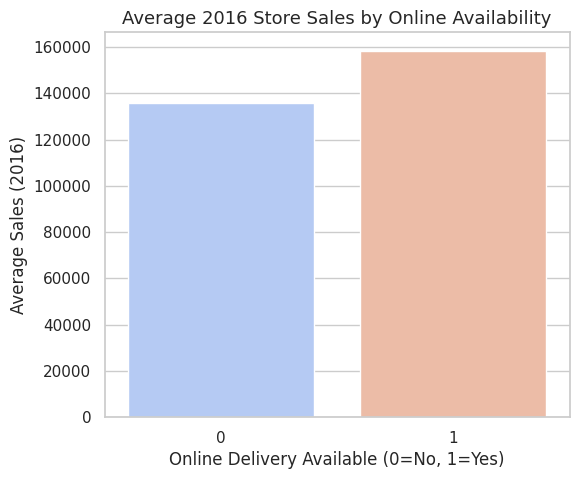

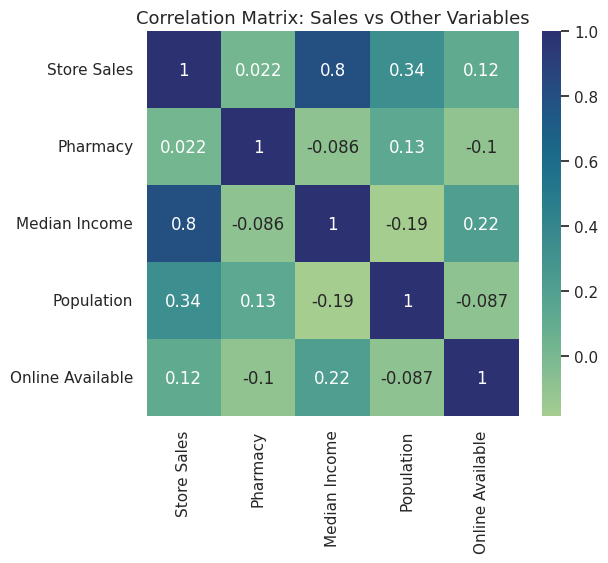

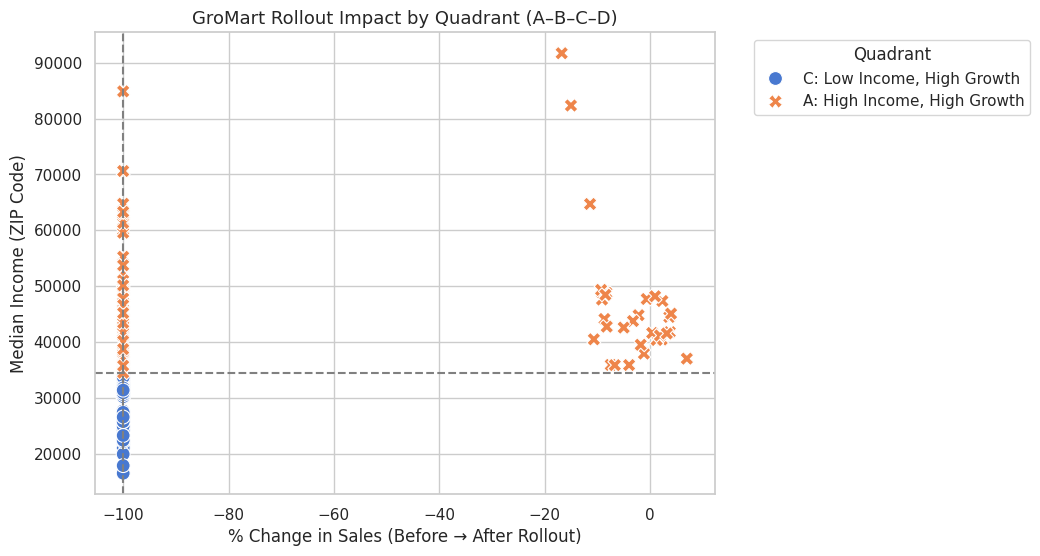

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="muted")


df = pd.read_csv("case4_data.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df.loc[df['Date'] < '2016-01-01', 'Online Available'] = 0
df['Period'] = np.where(df['Date'] < '2016-01-01', 'Before Rollout', 'After Rollout')


rollout_timeline = (
    df[df['Year'] == 2016] if 'Year' in df.columns
    else df[df['Date'].dt.year == 2016]
).groupby(df['Date'].dt.to_period('M'))['Online Available'].sum().reset_index()

rollout_timeline['Date'] = rollout_timeline['Date'].dt.to_timestamp()

plt.figure(figsize=(10,5))
sns.lineplot(data=rollout_timeline, x='Date', y='Online Available', marker='o')
plt.title("GroMart Online Rollout Across ZIP Codes (2016, Cleaned)", fontsize=13)
plt.ylabel("Number of ZIP Codes with Online Delivery")
plt.xlabel("Month")
plt.grid(True)
plt.show()


avg_sales = (
    df.groupby(['Period', 'Online Available'])['Store Sales']
    .mean()
    .reset_index()
)
plt.figure(figsize=(7,5))
sns.barplot(data=avg_sales, x='Period', y='Store Sales', hue='Online Available', palette='mako')
plt.title("Average Store Sales Before vs After Rollout", fontsize=13)
plt.ylabel("Average Monthly Sales")
plt.xlabel("Period")
plt.legend(title="Online Available (1=Yes, 0=No)")
plt.show()


sales_summary = (
    df.groupby(['Zipcodes', 'Period'])['Store Sales']
    .mean()
    .unstack()
    .dropna()
)
sales_summary['% Change'] = ((sales_summary['After Rollout'] - sales_summary['Before Rollout'])
                             / sales_summary['Before Rollout']) * 100

plt.figure(figsize=(10,5))
sns.histplot(sales_summary['% Change'], kde=True, color='teal', bins=15)
plt.title("Distribution of % Change in Sales (Before vs After Rollout)", fontsize=13)
plt.xlabel("% Change in Sales per Store")
plt.show()


df['Year'] = df['Date'].dt.year
impact_2016 = (
    df[df['Year'] == 2016]
    .groupby('Online Available')['Store Sales']
    .mean()
    .reset_index()
)
plt.figure(figsize=(6,5))
sns.barplot(data=impact_2016, x='Online Available', y='Store Sales', palette='coolwarm')
plt.title("Average 2016 Store Sales by Online Availability", fontsize=13)
plt.ylabel("Average Sales (2016)")
plt.xlabel("Online Delivery Available (0=No, 1=Yes)")
plt.show()


corr_cols = ['Store Sales', 'Pharmacy', 'Median Income', 'Population', 'Online Available']
plt.figure(figsize=(6,5))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='crest')
plt.title("Correlation Matrix: Sales vs Other Variables", fontsize=13)
plt.show()


performance = (
    df.groupby(['Zipcodes', 'Online Available'])['Store Sales']
    .mean()
    .unstack(fill_value=0)
    .reset_index()
)
performance.columns = ['Zipcodes', 'Offline_Avg', 'Online_Avg']
performance['%_Change'] = ((performance['Online_Avg'] - performance['Offline_Avg'])
                           / performance['Offline_Avg']) * 100


store_data = df.groupby('Zipcodes')[['Median Income', 'Population', 'Pharmacy']].mean().reset_index()
performance = performance.merge(store_data, on='Zipcodes', how='left')


x_median = performance['%_Change'].median()
y_median = performance['Median Income'].median()

def assign_quadrant(row):
    if row['%_Change'] >= x_median and row['Median Income'] >= y_median:
        return 'A: High Income, High Growth'
    elif row['%_Change'] < x_median and row['Median Income'] >= y_median:
        return 'B: High Income, Low Growth'
    elif row['%_Change'] >= x_median and row['Median Income'] < y_median:
        return 'C: Low Income, High Growth'
    else:
        return 'D: Low Income, Low Growth'

performance['Quadrant'] = performance.apply(assign_quadrant, axis=1)


plt.figure(figsize=(8,6))
sns.scatterplot(data=performance, x='%_Change', y='Median Income',
                hue='Quadrant', style='Quadrant', s=100)
plt.axvline(x=x_median, color='gray', linestyle='--')
plt.axhline(y=y_median, color='gray', linestyle='--')
plt.title("GroMart Rollout Impact by Quadrant (A–B–C–D)", fontsize=13)
plt.xlabel("% Change in Sales (Before → After Rollout)")
plt.ylabel("Median Income (ZIP Code)")
plt.legend(title="Quadrant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


=== Average Metrics per Quadrant ===
                      Quadrant  Median Income    %_Change
0  A: High Income, High Growth   47330.237500  -63.839268
1   C: Low Income, High Growth   28474.556962 -100.000000


/tmp/ipython-input-2169876376.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quad_summary, x='Quadrant', y='Median Income', palette='viridis')


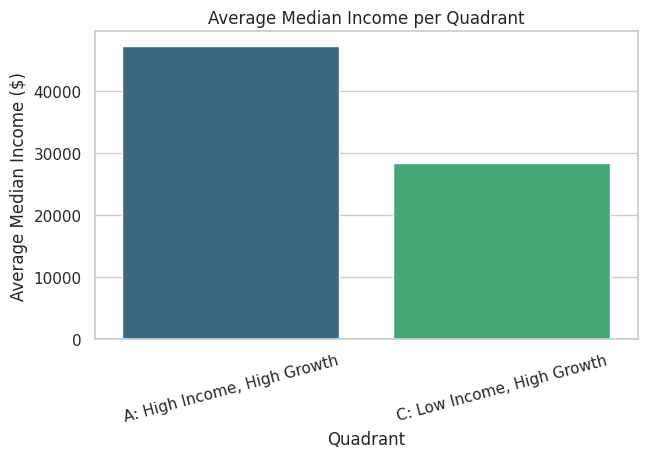

/tmp/ipython-input-2169876376.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quad_summary, x='Quadrant', y='%_Change', palette='coolwarm')


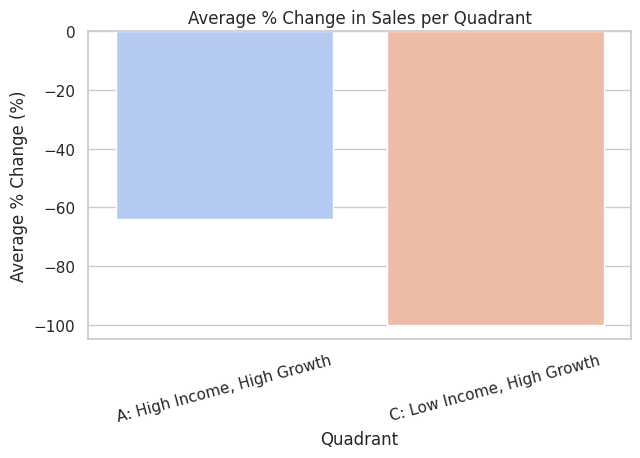

In [ ]:

quad_summary = (
    performance.groupby('Quadrant')[['Median Income', '%_Change']]
    .mean()
    .reset_index()
    .sort_values('Median Income', ascending=False)
)

print("=== Average Metrics per Quadrant ===")
print(quad_summary)


plt.figure(figsize=(7,4))
sns.barplot(data=quad_summary, x='Quadrant', y='Median Income', palette='viridis')
plt.title("Average Median Income per Quadrant")
plt.ylabel("Average Median Income ($)")
plt.xlabel("Quadrant")
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(7,4))
sns.barplot(data=quad_summary, x='Quadrant', y='%_Change', palette='coolwarm')
plt.title("Average % Change in Sales per Quadrant")
plt.ylabel("Average % Change (%)")
plt.xlabel("Quadrant")
plt.xticks(rotation=15)
plt.show()


/tmp/ipython-input-1079964197.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipython-input-1079964197.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quad_summary, x='Quadrant', y='Median Income', palette='crest', ax=axes[0])
/tmp/ipython-input-1079964197.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quad_summary, x='Quadrant', y='%_Change', palette='coolwarm', ax=axes[1])


Median %_Change: -100.00, Median Income: 34548.00

--- Quadrant Counts ---
Quadrant
A: High Income, High Growth    80
C: Low Income, High Growth     79
Name: count, dtype: int64

--- Median Income & % Change per Quadrant ---
                      Quadrant  Median Income  %_Change
0  A: High Income, High Growth        44342.0    -100.0
1   B: High Income, Low Growth            NaN       NaN
2   C: Low Income, High Growth        30454.0    -100.0
3    D: Low Income, Low Growth            NaN       NaN


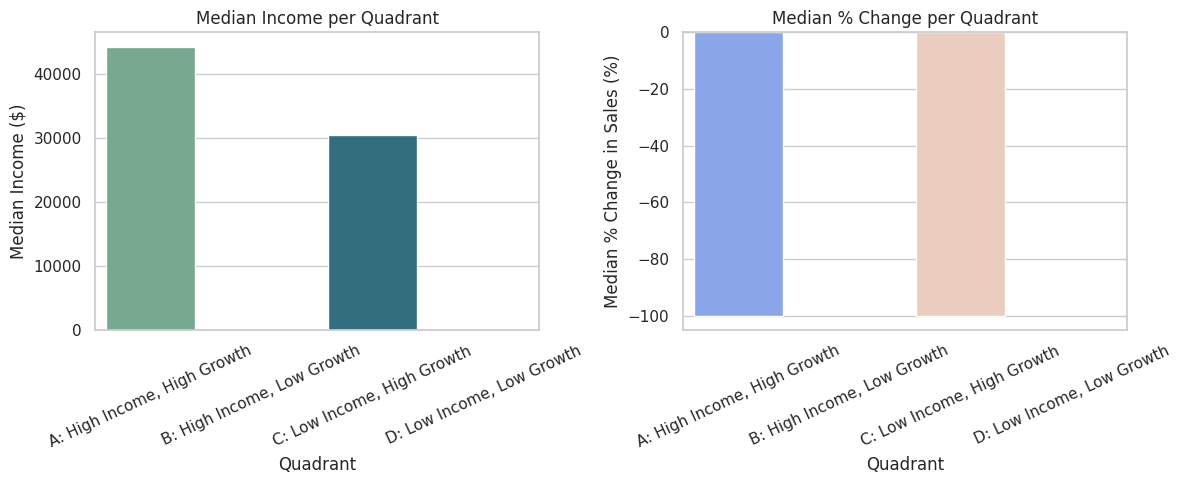

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("case4_data.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df.loc[df['Date'] < '2016-01-01', 'Online Available'] = 0
df['Year'] = df['Date'].dt.year


performance = (
    df.groupby(['Zipcodes', 'Online Available'])['Store Sales']
    .mean()
    .unstack(fill_value=0)
    .reset_index()
)
performance.columns = ['Zipcodes', 'Offline_Avg', 'Online_Avg']
performance['%_Change'] = ((performance['Online_Avg'] - performance['Offline_Avg']) /
                           performance['Offline_Avg']) * 100


store_data = df.groupby('Zipcodes')[['Median Income', 'Population', 'Pharmacy']].mean().reset_index()
performance = performance.merge(store_data, on='Zipcodes', how='left')


x_median = performance['%_Change'].median()
y_median = performance['Median Income'].median()
print(f"Median %_Change: {x_median:.2f}, Median Income: {y_median:.2f}")


def assign_quadrant(row):
    if row['%_Change'] >= x_median and row['Median Income'] >= y_median:
        return 'A: High Income, High Growth'
    elif row['%_Change'] < x_median and row['Median Income'] >= y_median:
        return 'B: High Income, Low Growth'
    elif row['%_Change'] >= x_median and row['Median Income'] < y_median:
        return 'C: Low Income, High Growth'
    else:
        return 'D: Low Income, Low Growth'

performance['Quadrant'] = performance.apply(assign_quadrant, axis=1)


print("\n--- Quadrant Counts ---")
print(performance['Quadrant'].value_counts())


quad_summary = (
    performance.groupby('Quadrant')[['Median Income', '%_Change']]
    .median()
    .reindex([
        'A: High Income, High Growth',
        'B: High Income, Low Growth',
        'C: Low Income, High Growth',
        'D: Low Income, Low Growth'
    ])
    .reset_index()
)

print("\n--- Median Income & % Change per Quadrant ---")
print(quad_summary)


fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(data=quad_summary, x='Quadrant', y='Median Income', palette='crest', ax=axes[0])
axes[0].set_title('Median Income per Quadrant')
axes[0].set_ylabel('Median Income ($)')
axes[0].set_xlabel('Quadrant')
axes[0].tick_params(axis='x', rotation=25)

sns.barplot(data=quad_summary, x='Quadrant', y='%_Change', palette='coolwarm', ax=axes[1])
axes[1].set_title('Median % Change per Quadrant')
axes[1].set_ylabel('Median % Change in Sales (%)')
axes[1].set_xlabel('Quadrant')
axes[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()


# Task
Display descriptive statistics (count, mean, std, min, max, quartiles) for all numerical columns in the DataFrame, then calculate and print the mean and median for 'Store Sales', 'Median Income', and 'Population'. After that, generate histograms for the distribution of 'Store Sales', 'Median Income', and 'Population', and create a box plot for 'Store Sales' to show its median, quartiles, and identify outliers, using the 'case4_data.csv' dataset.

## Load and Clean Data

### Subtask:
Ensure the dataset 'case4_data.csv' is loaded into a DataFrame and perform initial cleaning, including date conversion and correcting 'Online Available' flags, if not already done.


## Display Descriptive Statistics

### Subtask:
Calculate and print a comprehensive summary of descriptive statistics (count, mean, std, min, max, quartiles) for all numerical columns in the DataFrame.


**Reasoning**:
The subtask requires calculating and printing descriptive statistics for all numerical columns. The `.describe()` method is suitable for this purpose, providing count, mean, std, min, max, and quartiles.



In [ ]:
print(df.describe())

           Zipcodes                 Date  Online Available     Pharmacy  \
count   3816.000000                 3816       3816.000000  3816.000000   
mean   92746.635220  2015-12-16 10:00:00          0.094340     0.553459   
min    90004.000000  2015-01-01 00:00:00          0.000000     0.000000   
25%    91745.000000  2015-06-23 12:00:00          0.000000     0.000000   
50%    92563.000000  2015-12-16 12:00:00          0.000000     1.000000   
75%    94110.000000  2016-06-08 12:00:00          0.000000     1.000000   
max    96003.000000  2016-12-01 00:00:00          1.000000     1.000000   
std     1650.993173                  NaN          0.292339     0.497199   

         Store Sales  Median Income    Population         Year  
count    3816.000000    3816.000000   3816.000000  3816.000000  
mean   140479.200663   37961.691824  38525.823899  2015.500000  
min     47885.610000   16576.000000  30080.000000  2015.000000  
25%    104463.257500   30454.000000  32638.000000  2015.000000  

**Reasoning**:
The previous code failed because the DataFrame `df` was not defined. To fix this, I need to include the necessary data loading and cleaning steps before attempting to call `df.describe()`, as per the preceding subtask's instructions and the general context of the notebook.



In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("case4_data.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df.loc[df['Date'] < '2016-01-01', 'Online Available'] = 0
df['Period'] = np.where(df['Date'] < '2016-01-01', 'Before Rollout', 'After Rollout')


print(df.describe())

           Zipcodes                 Date  Online Available     Pharmacy  \
count   3816.000000                 3816       3816.000000  3816.000000   
mean   92746.635220  2015-12-16 10:00:00          0.094340     0.553459   
min    90004.000000  2015-01-01 00:00:00          0.000000     0.000000   
25%    91745.000000  2015-06-23 12:00:00          0.000000     0.000000   
50%    92563.000000  2015-12-16 12:00:00          0.000000     1.000000   
75%    94110.000000  2016-06-08 12:00:00          0.000000     1.000000   
max    96003.000000  2016-12-01 00:00:00          1.000000     1.000000   
std     1650.993173                  NaN          0.292339     0.497199   

         Store Sales  Median Income    Population  
count    3816.000000    3816.000000   3816.000000  
mean   140479.200663   37961.691824  38525.823899  
min     47885.610000   16576.000000  30080.000000  
25%    104463.257500   30454.000000  32638.000000  
50%    132508.065000   34548.000000  36399.000000  
75%    16776

/tmp/ipython-input-1456377515.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# Task
Generate and display histograms for 'Store Sales', 'Median Income', and 'Population' to visualize their distributions, central tendencies, and spread.

## Load and Clean Data

### Subtask:
Load the 'case4_data.csv' dataset into a DataFrame, convert the 'Date' column to datetime objects, and correct 'Online Available' flags for dates before 2016-01-01 to 0. This ensures the data is ready for analysis.


**Reasoning**:
Load the dataset, convert the 'Date' column to datetime, and apply the specified cleaning to 'Online Available' based on the date.



In [ ]:
import pandas as pd

df = pd.read_csv('case4_data.csv')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df.loc[df['Date'] < '2016-01-01', 'Online Available'] = 0

print("Data loaded and cleaned successfully. First 5 rows:")
print(df.head())